In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

dataset_path = "/content/drive/MyDrive/DATASET_ORGANICO_INORGANICO_QUISPE_SUCULLANI_JOSE_DAVID/Quispe_Sucullani_Jose_David"

# Listar las subcarpetas (clases)
clases = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Clases encontradas:", clases)

Clases encontradas: ['CablesDeRed-Min', 'Hojas-Brocoli-Min', 'Monedas_Min', 'Bolsas-Refrescos-Min', 'Anillos-Min']


Clases encontradas: ['CablesDeRed-Min', 'Hojas-Brocoli-Min', 'Monedas_Min', 'Bolsas-Refrescos-Min', 'Anillos-Min']


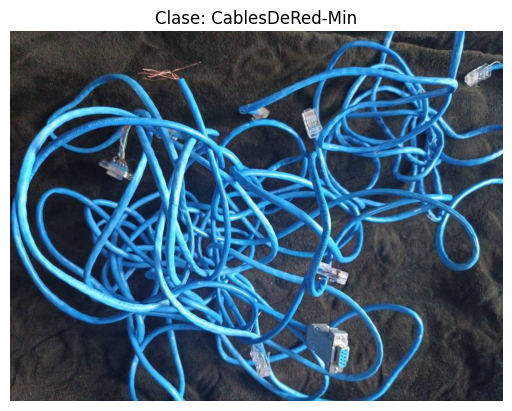

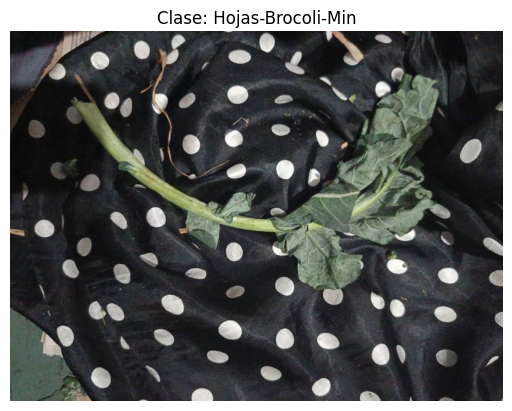

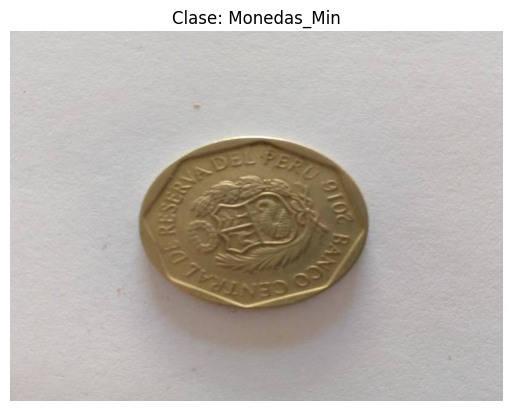

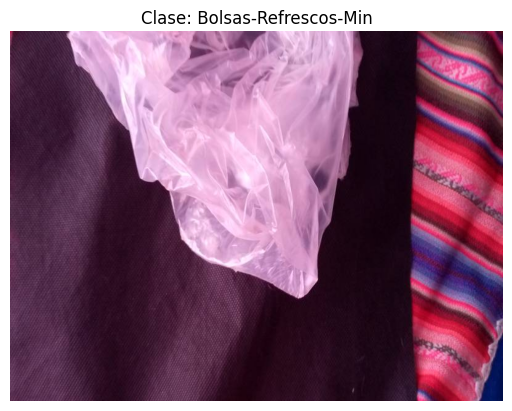

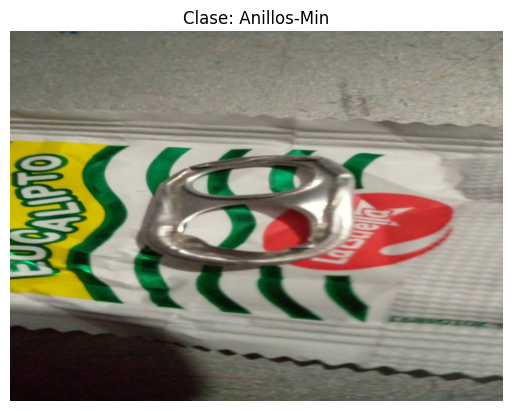

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

dataset_path = "/content/drive/MyDrive/DATASET_ORGANICO_INORGANICO_QUISPE_SUCULLANI_JOSE_DAVID/Quispe_Sucullani_Jose_David"

# Listar clases
clases = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Clases encontradas:", clases)

# Mostrar una imagen de cada clase
for clase in clases:
    # Buscar subcarpetas dentro de la clase
    subcarpetas = [d for d in os.listdir(os.path.join(dataset_path, clase))
                   if os.path.isdir(os.path.join(dataset_path, clase, d))]

    # Tomar la primera subcarpeta (si hay m√°s de una)
    subcarpeta = subcarpetas[0] if subcarpetas else ''

    # Listar im√°genes dentro de la subcarpeta
    imagenes = [f for f in os.listdir(os.path.join(dataset_path, clase, subcarpeta))
                if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not imagenes:
        continue  # Saltar si no hay im√°genes

    # Seleccionar imagen aleatoria
    imagen_aleatoria = random.choice(imagenes)

    # Ruta completa
    imagen_path = os.path.join(dataset_path, clase, subcarpeta, imagen_aleatoria)

    # Cargar y mostrar
    img = mpimg.imread(imagen_path)
    plt.imshow(img)
    plt.title(f"Clase: {clase}")
    plt.axis('off')
    plt.show()

In [4]:
import os
from PIL import Image
import numpy as np

# Change this path to your actual dataset directory
dataset_path = "/content/drive/MyDrive/DATASET_ORGANICO_INORGANICO_QUISPE_SUCULLANI_JOSE_DAVID/Quispe_Sucullani_Jose_David"

conteo = {}
resoluciones = []
image_extensions = ('.jpg', '.jpeg', '.png')

# Recorrer el directorio de forma recursiva
for root, dirs, files in os.walk(dataset_path):
    # Obtener el nombre de la clase desde el nombre del subdirectorio
    # Esto asume que el nombre de la clase es el nombre de la carpeta
    clase = os.path.basename(root)

    # Contar las im√°genes y recopilar resoluciones
    for filename in files:
        if filename.lower().endswith(image_extensions):
            # Incrementar el contador para la clase
            conteo[clase] = conteo.get(clase, 0) + 1

            # Tomar las resoluciones de las primeras im√°genes encontradas
            # para evitar sobrecargar la memoria
            if len(resoluciones) < 200:
                try:
                    img_path = os.path.join(root, filename)
                    with Image.open(img_path) as img:
                        resoluciones.append(img.size)
                except Exception as e:
                    print(f"Error procesando la imagen {img_path}: {e}")
                    continue

# Mostrar resultados
print("üìä Cantidad de im√°genes por clase:")
for clase, n in conteo.items():
    print(f"   {clase}: {n}")

if resoluciones:
    resoluciones = np.array(resoluciones)
    promedio = resoluciones.mean(axis=0)
    print("\nResoluci√≥n promedio (ancho x alto):", promedio.astype(int))

üìä Cantidad de im√°genes por clase:
   CablesDeRed-Min: 10010
   Hojas-Brocoli-Min: 11123
   Monedas_Min: 9308
   Bolsas-Refrescos-Min: 10030
   Anillos-Min: 6543

Resoluci√≥n promedio (ancho x alto): [800 600]


In [5]:
!pip install tqdm

Contando im√°genes por clase:  40%|‚ñà‚ñà‚ñà‚ñà      | 2/5 [00:00<00:00,  5.53it/s]


CablesDeRed-Min: 10010 im√°genes

Hojas-Brocoli-Min: 11123 im√°genes


Contando im√°genes por clase:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 4/5 [00:00<00:00,  6.59it/s]


Monedas_Min: 9308 im√°genes

Bolsas-Refrescos-Min: 10030 im√°genes


Contando im√°genes por clase: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:00<00:00,  6.68it/s]



Anillos-Min: 6543 im√°genes


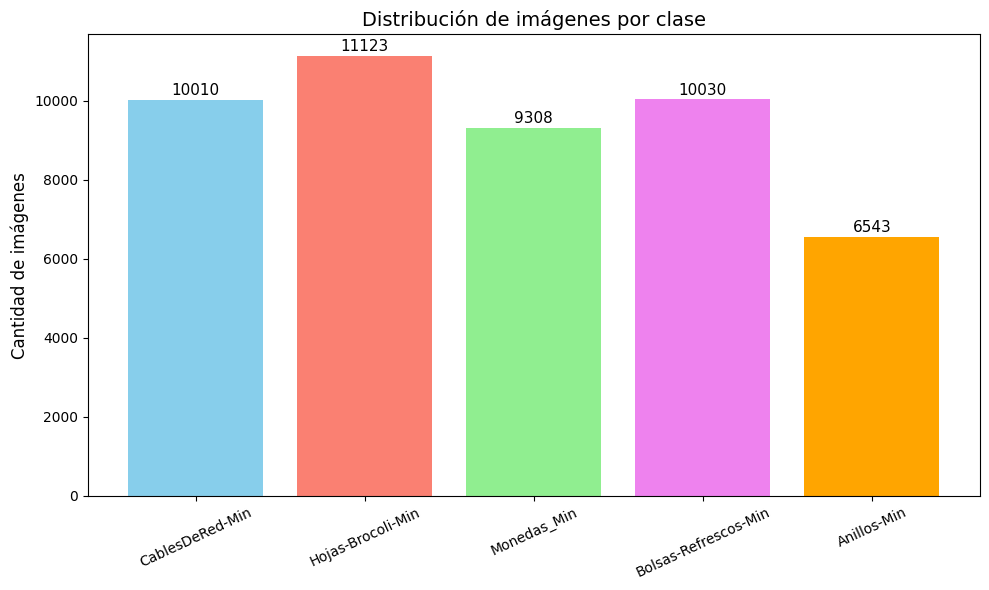

In [6]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm  # Importamos la librer√≠a tqdm

# Carpeta donde est√°n tus clases
dataset_path = "/content/drive/MyDrive/DATASET_ORGANICO_INORGANICO_QUISPE_SUCULLANI_JOSE_DAVID/Quispe_Sucullani_Jose_David"

# Detectar autom√°ticamente todas las clases (subcarpetas)
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Contar im√°genes por clase
counts = []
# Ahora el bucle mostrar√° una barra de progreso
for cls in tqdm(classes, desc="Contando im√°genes por clase"):
    cls_folder = os.path.join(dataset_path, cls)
    images = [f for f in os.listdir(cls_folder) if f.lower().endswith('.jpg')]
    counts.append(len(images))
    print(f"\n{cls}: {len(images)} im√°genes")

# Colores para cada barra
colors = ['skyblue', 'salmon', 'lightgreen', 'violet', 'orange']

# Graficar
plt.figure(figsize=(10,6))
bars = plt.bar(classes, counts, color=colors)
plt.title("Distribuci√≥n de im√°genes por clase", fontsize=14)
plt.ylabel("Cantidad de im√°genes", fontsize=12)
plt.xticks(rotation=25)

# Mostrar el n√∫mero exacto encima de cada barra
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(count), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# **Definiendo Transformers**

In [7]:
# CELDA 1: Imports y configuraci√≥n
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# Configuraci√≥n del modelo
IMG_SIZE = 224  # Redimensionar las im√°genes de 800x600 a 224x224
PATCH_SIZE = 16  # Cada patch ser√° de 16x16
N_PATCHES = (IMG_SIZE // PATCH_SIZE) ** 2  # 196 patches
EMBED_DIM = 768  # Dimensi√≥n de embedding
N_HEADS = 12  # N√∫mero de cabezas de atenci√≥n
N_LAYERS = 12  # N√∫mero de bloques transformer
N_CLASSES = 5  # Tus 5 clases

print(f"Configuraci√≥n: {N_PATCHES} patches de {PATCH_SIZE}x{PATCH_SIZE}, embedding {EMBED_DIM}D")

Configuraci√≥n: 196 patches de 16x16, embedding 768D


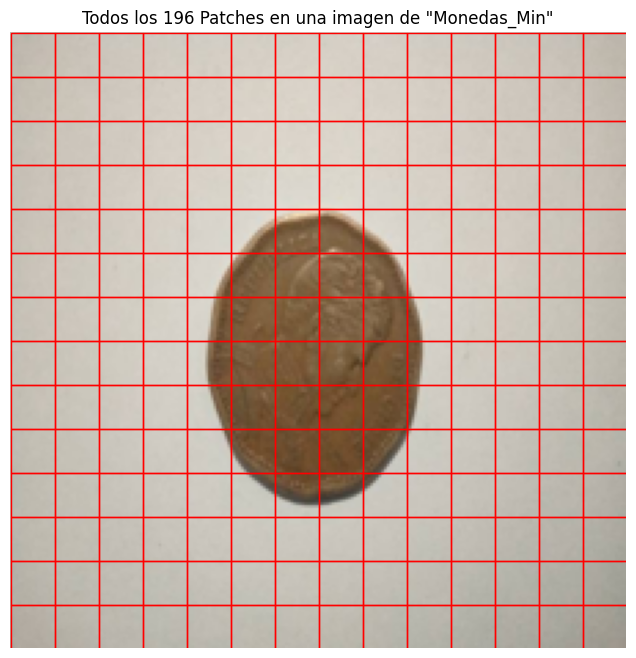

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import random

# --- CONFIGURACI√ìN AUTOM√ÅTICA DE RUTAS ---
BASE_DIR = '/content/drive/MyDrive/DATASET_ORGANICO_INORGANICO_QUISPE_SUCULLANI_JOSE_DAVID/Quispe_Sucullani_Jose_David'
CLASSES = ['CablesDeRed-Min', 'Hojas-Brocoli-Min', 'Monedas_Min', 'Bolsas-Refrescos-Min', 'Anillos-Min']

# --- CONFIGURACI√ìN DEL MODELO ---
IMG_SIZE = 224
PATCH_SIZE = 16
N_PATCHES_AXIS = IMG_SIZE // PATCH_SIZE  # 224 / 16 = 14

# --- C√ìDIGO DE VISUALIZACI√ìN ---
try:
    # 1. Seleccionar una clase y una imagen al azar
    random_class = random.choice(CLASSES)
    class_dir = os.path.join(BASE_DIR, random_class)
    all_images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    if not all_images:
        raise IndexError(f"La carpeta '{random_class}' est√° vac√≠a.")

    random_image_name = random.choice(all_images)
    img_path = os.path.join(class_dir, random_image_name)

    # 2. Abrir y preparar la imagen
    img = Image.open(img_path)
    img_resized = img.resize((IMG_SIZE, IMG_SIZE))

    # 3. Crear la figura para la visualizaci√≥n
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img_resized)
    ax.set_title(f'Todos los {N_PATCHES_AXIS*N_PATCHES_AXIS} Patches en una imagen de "{random_class}"')
    ax.axis('off')

    # 4. Dibujar la cuadr√≠cula completa de parches
    for y in range(0, IMG_SIZE, PATCH_SIZE):
        for x in range(0, IMG_SIZE, PATCH_SIZE):
            rect = patches.Rectangle(
                (x, y),           # Coordenada (x, y) de la esquina superior izquierda
                PATCH_SIZE,       # Ancho
                PATCH_SIZE,       # Alto
                linewidth=1,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)

    plt.show()

except (FileNotFoundError, IndexError) as e:
    print(f"Error: No se pudo cargar la imagen. Verifique la ruta del dataset y que las carpetas no est√©n vac√≠as.")
    print(f"Detalle del error: {e}")


In [9]:
# CELDA 3: Componentes del Transformer

class MultiHeadAttention(nn.Module):
    """
    Implementaci√≥n expl√≠cita de Multi-Head Attention.
    Funcionalmente id√©ntica a tu ScaledDotSelfAttention, pero m√°s f√°cil de leer.
    """
    def __init__(self, embed_dim, n_heads):
        super().__init__()
        self.embed_dim = embed_dim
        self.n_heads = n_heads
        self.head_dim = embed_dim // n_heads

        assert embed_dim % n_heads == 0, "La dimensi√≥n de embedding debe ser divisible por el n√∫mero de cabezas."

        # Capas lineales separadas para Query, Key, Value
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)

        # Capa de salida
        self.proj = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, L, D = x.shape  # (Batch_size, Sequence_length, Embed_dim)

        # 1. Proyectar y reformar Q, K, V para m√∫ltiples cabezas
        # El resultado de cada proyecci√≥n es (B, L, D)
        # Lo reformamos a (B, L, n_heads, head_dim) y permutamos para la atenci√≥n
        # El resultado final para q, k, v es (B, n_heads, L, head_dim)
        q = self.query(x).view(B, L, self.n_heads, self.head_dim).transpose(1, 2)
        k = self.key(x).view(B, L, self.n_heads, self.head_dim).transpose(1, 2)
        v = self.value(x).view(B, L, self.n_heads, self.head_dim).transpose(1, 2)

        # 2. Calcular scores de atenci√≥n escalados
        # (B, n_heads, L, head_dim) @ (B, n_heads, head_dim, L) -> (B, n_heads, L, L)
        scores = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(self.head_dim))
        attention = F.softmax(scores, dim=-1)

        # 3. Aplicar atenci√≥n a los valores
        # (B, n_heads, L, L) @ (B, n_heads, L, head_dim) -> (B, n_heads, L, head_dim)
        out = attention @ v

        # 4. Concatenar las cabezas y proyectar
        # Revertimos la transposici√≥n y aplanamos para volver a (B, L, D)
        out = out.transpose(1, 2).contiguous().view(B, L, D)

        return self.proj(out)


class TransformerBlock(nn.Module):
    """
    El bloque Transformer est√°ndar. No necesita cambios, solo usar√° la nueva clase.
    """
    def __init__(self, embed_dim, n_heads):
        super().__init__()
        # Simplemente cambiamos la clase que usamos aqu√≠
        self.attention = MultiHeadAttention(embed_dim, n_heads)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * 4),
            nn.GELU(),
            nn.Linear(embed_dim * 4, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # Flujo: Norma -> Atenci√≥n -> Conexi√≥n Residual
        x = x + self.attention(self.norm1(x))
        # Flujo: Norma -> MLP -> Conexi√≥n Residual
        x = x + self.mlp(self.norm2(x))
        return x

print("‚úÖ Clases MultiHeadAttention y TransformerBlock definidas.")

‚úÖ Clases MultiHeadAttention y TransformerBlock definidas.


In [10]:
# CELDA 4: Patch Embedding

class PatchEmbedding(nn.Module):
    """Convierte una imagen en una secuencia de embeddings de patches."""
    def __init__(self, img_size, patch_size, embed_dim):
        super().__init__()
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2

        # Una capa Conv2d con un kernel y stride del tama√±o del patch
        # act√∫a como la capa de proyecci√≥n para crear los embeddings.
        self.proj = nn.Conv2d(
            in_channels=3,          # Canales de entrada (RGB)
            out_channels=embed_dim, # Dimensi√≥n de salida para cada patch
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        # x tiene forma: (B, 3, H, W)
        x = self.proj(x)  # -> (B, embed_dim, n_patches_h, n_patches_w)
        x = x.flatten(2)  # -> (B, embed_dim, n_patches)
        x = x.transpose(1, 2)  # -> (B, n_patches, embed_dim)
        return x

print("‚úÖ Clase PatchEmbedding definida.")

‚úÖ Clase PatchEmbedding definida.


In [11]:
# CELDA 5: Modelo Vision Transformer Completo

class VisionTransformer(nn.Module):
    def __init__(self, img_size, patch_size, embed_dim, n_heads, n_layers, n_classes):
        super().__init__()

        # 1. Capa de Patch Embedding
        self.patch_embed = PatchEmbedding(img_size, patch_size, embed_dim)
        n_patches = self.patch_embed.n_patches

        # 2. Token [CLS] y Embeddings de Posici√≥n
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.randn(1, n_patches + 1, embed_dim))

        # 3. Pila de bloques Transformer
        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, n_heads) for _ in range(n_layers)
        ])

        # 4. Cabeza de clasificaci√≥n
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, n_classes)

    def forward(self, x):
        B = x.shape[0] # Tama√±o del batch

        x = self.patch_embed(x)

        # A√±adir el token [CLS] al principio de la secuencia de patches
        cls_token = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls_token, x], dim=1)

        # A√±adir los embeddings de posici√≥n
        x = x + self.pos_embed

        # Pasar por los bloques Transformer
        for block in self.blocks:
            x = block(x)

        # Obtener la salida del token [CLS] para la clasificaci√≥n
        cls_output = x[:, 0]
        cls_output = self.norm(cls_output)

        # Pasar por la cabeza de clasificaci√≥n
        logits = self.head(cls_output)

        return logits

print("‚úÖ Clase VisionTransformer definida y lista para usar.")

‚úÖ Clase VisionTransformer definida y lista para usar.


In [12]:
# CELDA 6: Crear y probar el modelo

# Crear una instancia del modelo con los par√°metros de la CELDA 1
model = VisionTransformer(
    img_size=IMG_SIZE,
    patch_size=PATCH_SIZE,
    embed_dim=EMBED_DIM,
    n_heads=N_HEADS,
    n_layers=N_LAYERS,
    n_classes=N_CLASSES
)

print("üöÄ Modelo Vision Transformer creado!")
print(f"   Par√°metros totales: {sum(p.numel() for p in model.parameters()):,}")

# --- Test de dimensiones ---
batch_size = 4  # Un batch peque√±o para la prueba
dummy_input = torch.randn(batch_size, 3, IMG_SIZE, IMG_SIZE)

print(f"\nüì• Input shape: {dummy_input.shape}")
print(f"   Shape esperado: ({batch_size}, 3, {IMG_SIZE}, {IMG_SIZE})")

# Realizar una pasada hacia adelante (forward pass)
with torch.no_grad(): # No necesitamos calcular gradientes para este test
    output = model(dummy_input)

print(f"üì§ Output shape: {output.shape}")
print(f"   Shape esperado: ({batch_size}, {N_CLASSES})")

# Verificar que las dimensiones son correctas
assert output.shape == (batch_size, N_CLASSES), f"Error en las dimensiones de salida: {output.shape}"
print("\n‚úÖ ¬°Test de dimensiones superado! El modelo est√° correctamente ensamblado.")

üöÄ Modelo Vision Transformer creado!
   Par√°metros totales: 85,802,501

üì• Input shape: torch.Size([4, 3, 224, 224])
   Shape esperado: (4, 3, 224, 224)
üì§ Output shape: torch.Size([4, 5])
   Shape esperado: (4, 5)

‚úÖ ¬°Test de dimensiones superado! El modelo est√° correctamente ensamblado.


In [13]:
# CELDA 7: Creaci√≥n del Modelo Final

# Determinar el dispositivo (GPU si est√° disponible, si no, CPU)
# En Kaggle con un notebook de GPU, esto seleccionar√° la P100.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instanciar el modelo final utilizando nuestras clases y los par√°metros de la CELDA 1
model = VisionTransformer(
    img_size=IMG_SIZE,
    patch_size=PATCH_SIZE,
    embed_dim=EMBED_DIM,
    n_heads=N_HEADS,
    n_layers=N_LAYERS,
    n_classes=N_CLASSES
)

# Mover el modelo al dispositivo seleccionado (GPU)
model.to(device)

# Imprimir una confirmaci√≥n para saber que todo est√° listo
print("üöÄ Modelo Vision Transformer final creado con √©xito.")
print(f"   Par√°metros totales: {sum(p.numel() for p in model.parameters()):,}")
print(f"   Modelo listo para entrenar en el dispositivo: '{device}'")

üöÄ Modelo Vision Transformer final creado con √©xito.
   Par√°metros totales: 85,802,501
   Modelo listo para entrenar en el dispositivo: 'cuda'


# ****# Fit de una muestra****

In [14]:
# CELDA 8 (Versi√≥n Mejorada): Test de Overfitting R√°pido

import torch.optim as optim

# --- 1. Crear Datos Falsos (Dummy Data) en la GPU ---
# Usamos un tensor aleatorio para simular una imagen. No necesitamos cargar nada.
single_image = torch.randn(1, 3, IMG_SIZE, IMG_SIZE, device=device)
# Creamos una etiqueta objetivo. El modelo debe aprender a predecir '2'.
single_label = torch.tensor([2], device=device)

print("üß™ Datos de prueba creados directamente en el dispositivo:", device)

# --- 2. Configurar el Entrenamiento ---
model.train() # Poner el modelo en modo entrenamiento
# AdamW es generalmente preferido para Transformers
optimizer = optim.AdamW(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

print("üöÄ Iniciando test de overfitting...")

# --- 3. Bucle de "Fit" ---
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    logits = model(single_image)
    loss = criterion(logits, single_label)
    loss.backward()
    optimizer.step()

    # Imprimir progreso en ciertos intervalos
    if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
        # Calcular la predicci√≥n y la accuracy
        pred = logits.argmax(dim=-1).item()
        accuracy = 100.0 if pred == single_label.item() else 0.0
        print(f"Epoch [{epoch+1:03d}/{num_epochs}], Loss: {loss.item():.6f}, Pred: {pred}, Accuracy: {accuracy:.0f}%")

# --- 4. Verificaci√≥n Final ---
model.eval() # Poner el modelo en modo evaluaci√≥n
with torch.no_grad():
    final_logits = model(single_image)
    final_pred = final_logits.argmax(dim=-1).item()
    final_accuracy = 100.0 if final_pred == single_label.item() else 0.0

# El objetivo es que la predicci√≥n final sea igual a la etiqueta '2'
success = (final_pred == single_label.item())

print("\n--- Resultado Final ---")
print(f"Resultado: {'üéâ √âXITO' if success else '‚ö†Ô∏è FALLO'}")
print(f"Predicci√≥n final: {final_pred} (Objetivo: {single_label.item()})")
print(f"Accuracy final: {final_accuracy:.0f}%")

if not success:
    print("\nAlerta: El modelo no memoriz√≥ la muestra. Revisa la arquitectura o el bucle de entrenamiento.")

üß™ Datos de prueba creados directamente en el dispositivo: cuda
üöÄ Iniciando test de overfitting...
Epoch [010/100], Loss: 0.000001, Pred: 2, Accuracy: 100%
Epoch [020/100], Loss: 0.000001, Pred: 2, Accuracy: 100%
Epoch [030/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [040/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [050/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [060/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [070/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [080/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [090/100], Loss: 0.000002, Pred: 2, Accuracy: 100%
Epoch [100/100], Loss: 0.000002, Pred: 2, Accuracy: 100%

--- Resultado Final ---
Resultado: üéâ √âXITO
Predicci√≥n final: 2 (Objetivo: 2)
Accuracy final: 100%


In [15]:
# CELDA 9: Test de Overfitting con un Lote Peque√±o

import torchvision.transforms as transforms
from PIL import Image
import torch.optim as optim

# --- 1. Definir el Tama√±o del Lote y Preparar los Datos ---
BATCH_SIZE_TEST = 8
batch_images = []
batch_labels = []

# Mapeo de nombre de clase a √≠ndice num√©rico
class_to_idx = {class_name: i for i, class_name in enumerate(CLASSES)}

# Transformaciones para las im√°genes
preprocess = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

print(f"üõ†Ô∏è  Creando un lote de {BATCH_SIZE_TEST} im√°genes reales...")

# Cargar 8 im√°genes y etiquetas reales al azar
for _ in range(BATCH_SIZE_TEST):
    random_class = random.choice(CLASSES)
    class_label = class_to_idx[random_class]

    class_dir = os.path.join(BASE_DIR, random_class)
    all_images_in_class = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    image_name = random.choice(all_images_in_class)
    image_path = os.path.join(class_dir, image_name)

    # Cargar, preprocesar y a√±adir a la lista
    image = Image.open(image_path).convert("RGB")
    image_tensor = preprocess(image)
    batch_images.append(image_tensor)
    batch_labels.append(class_label)

# Convertir las listas a tensores y moverlos a la GPU
# torch.stack apila los tensores de imagen para crear el lote
batch_images_tensor = torch.stack(batch_images).to(device)
batch_labels_tensor = torch.tensor(batch_labels).to(device)

print(f"   Tensor de im√°genes creado con shape: {batch_images_tensor.shape}")
print(f"   Tensor de etiquetas creado con shape: {batch_labels_tensor.shape}")

# --- 2. Configurar el Entrenamiento ---
model.train()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

print("\nüöÄ Iniciando test de overfitting en el lote...")

# --- 3. Bucle de "Fit" ---
num_epochs = 200 # Puede necesitar m√°s √©pocas para memorizar 8 im√°genes
for epoch in range(num_epochs):
    optimizer.zero_grad()
    logits = model(batch_images_tensor)
    loss = criterion(logits, batch_labels_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0 or epoch == num_epochs - 1:
        # Calcular la accuracy para el lote
        preds = logits.argmax(dim=-1)
        correct_preds = (preds == batch_labels_tensor).sum().item()
        accuracy = (correct_preds / BATCH_SIZE_TEST) * 100.0
        print(f"Epoch [{epoch+1:03d}/{num_epochs}], Loss: {loss.item():.6f}, Accuracy: {accuracy:.2f}%")

# --- 4. Verificaci√≥n Final ---
model.eval()
with torch.no_grad():
    final_logits = model(batch_images_tensor)
    final_preds = final_logits.argmax(dim=-1)
    final_correct = (final_preds == batch_labels_tensor).sum().item()
    final_accuracy = (final_correct / BATCH_SIZE_TEST) * 100.0

success = (final_accuracy == 100.0)

print("\n--- Resultado Final del Lote ---")
print(f"Resultado: {'üéâ √âXITO' if success else '‚ö†Ô∏è FALLO'}")
print(f"Predicciones: {final_preds.cpu().numpy()}")
print(f"Etiquetas Reales: {batch_labels_tensor.cpu().numpy()}")
print(f"Accuracy final: {final_accuracy:.2f}%")

üõ†Ô∏è  Creando un lote de 8 im√°genes reales...
   Tensor de im√°genes creado con shape: torch.Size([8, 3, 224, 224])
   Tensor de etiquetas creado con shape: torch.Size([8])

üöÄ Iniciando test de overfitting en el lote...
Epoch [020/200], Loss: 0.173784, Accuracy: 87.50%
Epoch [040/200], Loss: 0.002167, Accuracy: 100.00%
Epoch [060/200], Loss: 0.000420, Accuracy: 100.00%
Epoch [080/200], Loss: 0.000208, Accuracy: 100.00%
Epoch [100/200], Loss: 0.000150, Accuracy: 100.00%
Epoch [120/200], Loss: 0.000120, Accuracy: 100.00%
Epoch [140/200], Loss: 0.000101, Accuracy: 100.00%
Epoch [160/200], Loss: 0.000086, Accuracy: 100.00%
Epoch [180/200], Loss: 0.000076, Accuracy: 100.00%
Epoch [200/200], Loss: 0.000067, Accuracy: 100.00%

--- Resultado Final del Lote ---
Resultado: üéâ √âXITO
Predicciones: [1 1 3 2 3 4 1 3]
Etiquetas Reales: [1 1 3 2 3 4 1 3]
Accuracy final: 100.00%


In [16]:
# CELDA 10: Divisi√≥n del Dataset en Entrenamiento y Prueba

from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

# --- 1. Configuraci√≥n de la Divisi√≥n ---
TEST_SPLIT_RATIO = 0.20
RANDOM_STATE = 42 # Usar un estado fijo para que la divisi√≥n sea siempre la misma

# --- 2. Recopilar todos los datos ---
print("üîç Recopilando todas las rutas de im√°genes y etiquetas...")

all_filepaths = []
all_labels = []

# Mapeo de nombre de clase a √≠ndice num√©rico (reutilizado)
class_to_idx = {class_name: i for i, class_name in enumerate(CLASSES)}

for class_name in CLASSES:
    class_dir = os.path.join(BASE_DIR, class_name)
    image_files = os.listdir(class_dir)
    for img_file in image_files:
        all_filepaths.append(os.path.join(class_dir, img_file))
        all_labels.append(class_to_idx[class_name])

print(f"   Total de im√°genes encontradas: {len(all_filepaths)}")
print(f"   Total de etiquetas encontradas: {len(all_labels)}")


# --- 3. Realizar la Divisi√≥n Estratificada ---
print(f"\n‚úÇÔ∏è  Dividiendo el dataset: {100-TEST_SPLIT_RATIO*100:.0f}% train / {TEST_SPLIT_RATIO*100:.0f}% test...")

train_filepaths, test_filepaths, train_labels, test_labels = train_test_split(
    all_filepaths,
    all_labels,
    test_size=TEST_SPLIT_RATIO,
    random_state=RANDOM_STATE,
    stratify=all_labels  # ¬°La clave para una divisi√≥n balanceada!
)

print("\nDivisi√≥n completada.")

# --- 4. Verificar los resultados ---
print(f"   Im√°genes de entrenamiento: {len(train_filepaths)}")
print(f"   Im√°genes de prueba: {len(test_filepaths)}")

# Verificar la distribuci√≥n de clases en cada conjunto
train_distribution = Counter(train_labels)
test_distribution = Counter(test_labels)

print("\nüìä Distribuci√≥n de clases en el conjunto de entrenamiento:")
for i in range(N_CLASSES):
    print(f"   Clase {i} ({CLASSES[i]}): {train_distribution[i]} im√°genes")

print("\nüìä Distribuci√≥n de clases en el conjunto de prueba:")
for i in range(N_CLASSES):
    print(f"   Clase {i} ({CLASSES[i]}): {test_distribution[i]} im√°genes")

# Comprobar si la proporci√≥n es correcta
expected_train = (1 - TEST_SPLIT_RATIO) * 10000
expected_test = TEST_SPLIT_RATIO * 10000
print(f"\n(Se esperaban ~{expected_train:.0f} de train y ~{expected_test:.0f} de test por clase)")

üîç Recopilando todas las rutas de im√°genes y etiquetas...
   Total de im√°genes encontradas: 47014
   Total de etiquetas encontradas: 47014

‚úÇÔ∏è  Dividiendo el dataset: 80% train / 20% test...

Divisi√≥n completada.
   Im√°genes de entrenamiento: 37611
   Im√°genes de prueba: 9403

üìä Distribuci√≥n de clases en el conjunto de entrenamiento:
   Clase 0 (CablesDeRed-Min): 8008 im√°genes
   Clase 1 (Hojas-Brocoli-Min): 8898 im√°genes
   Clase 2 (Monedas_Min): 7446 im√°genes
   Clase 3 (Bolsas-Refrescos-Min): 8024 im√°genes
   Clase 4 (Anillos-Min): 5235 im√°genes

üìä Distribuci√≥n de clases en el conjunto de prueba:
   Clase 0 (CablesDeRed-Min): 2002 im√°genes
   Clase 1 (Hojas-Brocoli-Min): 2225 im√°genes
   Clase 2 (Monedas_Min): 1862 im√°genes
   Clase 3 (Bolsas-Refrescos-Min): 2006 im√°genes
   Clase 4 (Anillos-Min): 1308 im√°genes

(Se esperaban ~8000 de train y ~2000 de test por clase)


In [17]:
# CELDA 11: Creaci√≥n de un Subconjunto Estratificado para Experimentaci√≥n

from sklearn.model_selection import train_test_split
from collections import Counter

# --- 1. Configuraci√≥n ---
SUBSET_RATIO = 0.10  # Queremos el 10% del dataset total
TEST_SPLIT_RATIO = 0.20 # Divisi√≥n 80/20 para el subconjunto
RANDOM_STATE = 42

print(f"üéØ Objetivo: Crear un subconjunto del {SUBSET_RATIO*100:.0f}% del total de los datos.")

# --- 2. Extraer el Subconjunto Estratificado ---
# Usamos train_test_split para sacar una muestra estratificada.
# Nos quedamos con el 'test_set' de esta divisi√≥n, que ser√° nuestro 10%.
_, subset_filepaths, _, subset_labels = train_test_split(
    all_filepaths,
    all_labels,
    test_size=SUBSET_RATIO, # Tomamos el 10%
    random_state=RANDOM_STATE,
    stratify=all_labels
)

print("\n‚úÖ Subconjunto del 10% extra√≠do con √©xito.")
print(f"   Im√°genes en el subconjunto: {len(subset_filepaths)}")
subset_distribution = Counter(subset_labels)
print("   Distribuci√≥n de clases en el subconjunto:")
for i in range(N_CLASSES):
    print(f"      Clase {i}: {subset_distribution[i]} im√°genes")


# --- 3. Dividir el Subconjunto en Entrenamiento y Prueba ---
print(f"\n‚úÇÔ∏è  Dividiendo el subconjunto: {100-TEST_SPLIT_RATIO*100:.0f}% train / {TEST_SPLIT_RATIO*100:.0f}% test...")

sub_train_filepaths, sub_test_filepaths, sub_train_labels, sub_test_labels = train_test_split(
    subset_filepaths,
    subset_labels,
    test_size=TEST_SPLIT_RATIO,
    random_state=RANDOM_STATE,
    stratify=subset_labels
)

print("\n‚úÖ Divisi√≥n del subconjunto completada.")
print(f"   Im√°genes de sub-entrenamiento: {len(sub_train_filepaths)}")
print(f"   Im√°genes de sub-prueba: {len(sub_test_filepaths)}")

# --- 4. Verificaci√≥n Final de la Distribuci√≥n ---
sub_train_dist = Counter(sub_train_labels)
print("\nüìä Distribuci√≥n final (Sub-Train):")
for i in range(N_CLASSES):
    print(f"   Clase {i}: {sub_train_dist[i]} im√°genes") # Deber√≠an ser 800

sub_test_dist = Counter(sub_test_labels)
print("\nüìä Distribuci√≥n final (Sub-Test):")
for i in range(N_CLASSES):
    print(f"   Clase {i}: {sub_test_dist[i]} im√°genes") # Deber√≠an ser 200

üéØ Objetivo: Crear un subconjunto del 10% del total de los datos.

‚úÖ Subconjunto del 10% extra√≠do con √©xito.
   Im√°genes en el subconjunto: 4702
   Distribuci√≥n de clases en el subconjunto:
      Clase 0: 1001 im√°genes
      Clase 1: 1113 im√°genes
      Clase 2: 931 im√°genes
      Clase 3: 1003 im√°genes
      Clase 4: 654 im√°genes

‚úÇÔ∏è  Dividiendo el subconjunto: 80% train / 20% test...

‚úÖ Divisi√≥n del subconjunto completada.
   Im√°genes de sub-entrenamiento: 3761
   Im√°genes de sub-prueba: 941

üìä Distribuci√≥n final (Sub-Train):
   Clase 0: 801 im√°genes
   Clase 1: 890 im√°genes
   Clase 2: 745 im√°genes
   Clase 3: 802 im√°genes
   Clase 4: 523 im√°genes

üìä Distribuci√≥n final (Sub-Test):
   Clase 0: 200 im√°genes
   Clase 1: 223 im√°genes
   Clase 2: 186 im√°genes
   Clase 3: 201 im√°genes
   Clase 4: 131 im√°genes


In [18]:
# CELDA 12: Datasets y DataLoaders para el Subconjunto

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

# Creamos una clase Dataset que funciona con nuestras listas de rutas y etiquetas
class ImageListDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        img_path = self.filepaths[idx]
        label = self.labels[idx]

        # Cargar imagen
        image = Image.open(img_path).convert('RGB')

        # Aplicar transformaciones
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)

# --- Definir Transformaciones ---
# Para entrenamiento: a√±adimos augmentation para hacer el modelo m√°s robusto
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(), # Voltea im√°genes horizontalmente al azar
    transforms.RandomRotation(10),     # Rota im√°genes hasta 10 grados al azar
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Para validaci√≥n/prueba: sin augmentation, solo preprocesamiento
val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Crear los Datasets ---
sub_train_dataset = ImageListDataset(sub_train_filepaths, sub_train_labels, transform=train_transforms)
sub_test_dataset = ImageListDataset(sub_test_filepaths, sub_test_labels, transform=val_transforms)

print("‚úÖ Datasets para el subconjunto creados.")
print(f"   Train Dataset: {len(sub_train_dataset)} im√°genes")
print(f"   Test Dataset: {len(sub_test_dataset)} im√°genes")
# Los DataLoaders se crear√°n din√°micamente en la siguiente celda dentro del bucle de prueba.

‚úÖ Datasets para el subconjunto creados.
   Train Dataset: 3761 im√°genes
   Test Dataset: 941 im√°genes


In [19]:
!pip install tqdm

In [20]:
# CELDA 13 (Modificada): Bucle de B√∫squeda con Historial

import torch.optim as optim
import time
from tqdm import tqdm # <--- Se a√±adi√≥ tqdm

# --- 1. Espacio de B√∫squeda de Hiperpar√°metros ---
learning_rates = [1e-4, 3e-5]
batch_sizes = [16, 32]
weight_decays = [0.01, 0.05]
num_epochs_per_run = 3 # <--- Se redujo el n√∫mero de √©pocas

results = []
run_id = 0

print(f"üöÄ Iniciando b√∫squeda de hiperpar√°metros. Total de combinaciones: {len(learning_rates) * len(batch_sizes) * len(weight_decays)}")

# --- 2. Bucle Principal (Grid Search) ---
for bs in batch_sizes:
    sub_train_loader = DataLoader(sub_train_dataset, batch_size=bs, shuffle=True, num_workers=2)
    sub_test_loader = DataLoader(sub_test_dataset, batch_size=bs, shuffle=False, num_workers=2)

    for lr in learning_rates:
        for wd in weight_decays:
            run_id += 1
            start_time = time.time()
            print(f"\n--- [Run {run_id}] Config: BS={bs}, LR={lr}, WD={wd} ---")

            model = VisionTransformer(IMG_SIZE, PATCH_SIZE, EMBED_DIM, N_HEADS, N_LAYERS, N_CLASSES).to(device)
            optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
            criterion = nn.CrossEntropyLoss()

            # Lista para guardar el historial de accuracy de este run
            val_accuracy_history = []

            # Se a√±adi√≥ tqdm para el bucle de √©pocas
            for epoch in tqdm(range(num_epochs_per_run), desc=f"Run {run_id}"):
                model.train()
                # Se a√±adi√≥ tqdm para el bucle de entrenamiento
                for images, labels in tqdm(sub_train_loader, desc=f"Epoch {epoch+1} Training", leave=False):
                    images, labels = images.to(device), labels.to(device)
                    optimizer.zero_grad()
                    logits = model(images)
                    loss = criterion(logits, labels)
                    loss.backward()
                    optimizer.step()

                model.eval()
                val_correct, total = 0, 0
                with torch.no_grad():
                    # Se a√±adi√≥ tqdm para el bucle de validaci√≥n
                    for images, labels in tqdm(sub_test_loader, desc=f"Epoch {epoch+1} Validation", leave=False):
                        images, labels = images.to(device), labels.to(device)
                        logits = model(images)
                        preds = logits.argmax(dim=-1)
                        val_correct += (preds == labels).sum().item()
                        total += labels.size(0)

                val_accuracy = (val_correct / total) * 100
                val_accuracy_history.append(val_accuracy)

            end_time = time.time()
            print(f"-> Mejor Accuracy de Validaci√≥n: {max(val_accuracy_history):.2f}% (en {num_epochs_per_run} √©pocas)")

            # Guardar resultados completos del run
            results.append({
                'run_id': run_id,
                'batch_size': bs,
                'learning_rate': lr,
                'weight_decay': wd,
                'best_val_accuracy': max(val_accuracy_history),
                'accuracy_history': val_accuracy_history,
                'time_seconds': end_time - start_time
            })

print("\n‚úÖ B√∫squeda de hiperpar√°metros completada.")

üöÄ Iniciando b√∫squeda de hiperpar√°metros. Total de combinaciones: 8

--- [Run 1] Config: BS=16, LR=0.0001, WD=0.01 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [05:33<00:00,  1.03it/s]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:11<00:00,  1.81it/s]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.81it/s]
                                                                   
Run 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [11:44<00:00, 234.78s/it]


-> Mejor Accuracy de Validaci√≥n: 98.51% (en 3 √©pocas)

--- [Run 2] Config: BS=16, LR=0.0001, WD=0.05 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.82it/s]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.80it/s]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.81it/s]
                                                                   
Run 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [07:06<00:00, 142.30s/it]


-> Mejor Accuracy de Validaci√≥n: 98.94% (en 3 √©pocas)

--- [Run 3] Config: BS=16, LR=3e-05, WD=0.01 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.81it/s]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:11<00:00,  1.80it/s]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.80it/s]
                                                                   
Run 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [07:07<00:00, 142.64s/it]


-> Mejor Accuracy de Validaci√≥n: 99.04% (en 3 √©pocas)

--- [Run 4] Config: BS=16, LR=3e-05, WD=0.05 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:10<00:00,  1.80it/s]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:11<00:00,  1.80it/s]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 236/236 [02:11<00:00,  1.80it/s]
                                                                   
Run 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [07:08<00:00, 142.78s/it]


-> Mejor Accuracy de Validaci√≥n: 96.17% (en 3 √©pocas)

--- [Run 5] Config: BS=32, LR=0.0001, WD=0.01 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.07s/it]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.07s/it]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:05<00:00,  1.07s/it]
                                                                   
Run 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [06:53<00:00, 137.75s/it]


-> Mejor Accuracy de Validaci√≥n: 97.66% (en 3 √©pocas)

--- [Run 6] Config: BS=32, LR=0.0001, WD=0.05 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.07s/it]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.07s/it]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:05<00:00,  1.07s/it]
                                                                   
Run 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [06:52<00:00, 137.66s/it]


-> Mejor Accuracy de Validaci√≥n: 98.09% (en 3 √©pocas)

--- [Run 7] Config: BS=32, LR=3e-05, WD=0.01 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.07s/it]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:05<00:00,  1.07s/it]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.08s/it]
                                                                   
Run 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [06:54<00:00, 138.02s/it]


-> Mejor Accuracy de Validaci√≥n: 98.19% (en 3 √©pocas)

--- [Run 8] Config: BS=32, LR=3e-05, WD=0.05 ---


Epoch 1 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.07s/it]
                                                                   
Epoch 2 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:05<00:00,  1.07s/it]
                                                                   
Epoch 3 Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 118/118 [02:06<00:00,  1.08s/it]
                                                                   
Run 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [06:54<00:00, 138.11s/it]

-> Mejor Accuracy de Validaci√≥n: 97.02% (en 3 √©pocas)

‚úÖ B√∫squeda de hiperpar√°metros completada.


üèÜ Tabla Resumen de Resultados (Ordenada por Mejor Accuracy) üèÜ
   run_id  batch_size  learning_rate  weight_decay  best_val_accuracy  \
2       3          16        0.00003          0.01          99.043571   
1       2          16        0.00010          0.05          98.937301   
0       1          16        0.00010          0.01          98.512221   
6       7          32        0.00003          0.01          98.193411   
5       6          32        0.00010          0.05          98.087141   
4       5          32        0.00010          0.01          97.662062   
7       8          32        0.00003          0.05          97.024442   
3       4          16        0.00003          0.05          96.174283   

   time_seconds  
2    428.618733  
1    427.635000  
0    705.081631  
6    414.818280  
5    413.699144  
4    413.942672  
7    415.062665  
3    429.011075  


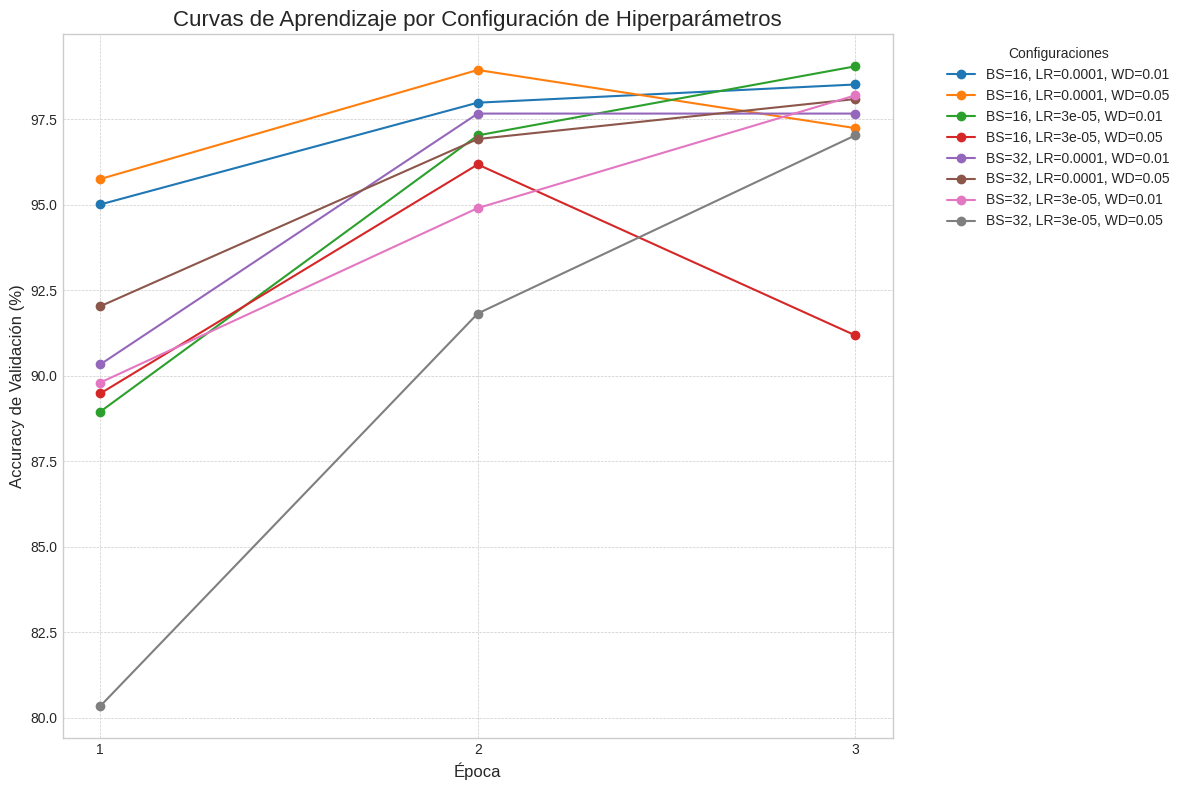


--- ü•á Mejor Configuraci√≥n Encontrada ---
Batch Size: 16.0
Learning Rate: 3e-05
Weight Decay: 0.01
Mejor Accuracy en Validaci√≥n (Subconjunto): 99.04%


In [21]:
# CELDA 14 (Mejorada): An√°lisis de Resultados con Pandas y Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Resumen con Pandas ---
results_df = pd.DataFrame(results)
# Creamos una copia sin la columna de historial para una vista m√°s limpia
summary_df = results_df.drop(columns=['accuracy_history']).sort_values(by='best_val_accuracy', ascending=False)

print("üèÜ Tabla Resumen de Resultados (Ordenada por Mejor Accuracy) üèÜ")
print(summary_df)

best_run_params = summary_df.iloc[0]

# --- 2. Visualizaci√≥n con Matplotlib ---
plt.style.use('seaborn-v0_8-whitegrid') # Estilo de gr√°fico agradable
fig, ax = plt.subplots(figsize=(12, 8))

for index, run in results_df.iterrows():
    # Crear una etiqueta clara para cada l√≠nea en el gr√°fico
    label = f"BS={run['batch_size']}, LR={run['learning_rate']}, WD={run['weight_decay']}"
    ax.plot(
        range(1, num_epochs_per_run + 1),
        run['accuracy_history'],
        marker='o',
        linestyle='-',
        label=label
    )

# --- Mejorar el Gr√°fico ---
ax.set_title('Curvas de Aprendizaje por Configuraci√≥n de Hiperpar√°metros', fontsize=16)
ax.set_xlabel('√âpoca', fontsize=12)
ax.set_ylabel('Accuracy de Validaci√≥n (%)', fontsize=12)
ax.set_xticks(range(1, num_epochs_per_run + 1))
ax.legend(title="Configuraciones", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- 3. Conclusi√≥n ---
print("\n--- ü•á Mejor Configuraci√≥n Encontrada ---")
print(f"Batch Size: {best_run_params['batch_size']}")
print(f"Learning Rate: {best_run_params['learning_rate']}")
print(f"Weight Decay: {best_run_params['weight_decay']}")
print(f"Mejor Accuracy en Validaci√≥n (Subconjunto): {best_run_params['best_val_accuracy']:.2f}%")

# Guardar los mejores hiperpar√°metros para usarlos en el entrenamiento final
BEST_BATCH_SIZE = int(best_run_params['batch_size'])
BEST_LR = best_run_params['learning_rate']
BEST_WD = best_run_params['weight_decay']

# **Entrenamiento y Metricas**

In [22]:
# CELDA 15: Configuraci√≥n para el Entrenamiento Final
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

# --- 1. Crear Datasets y DataLoaders para el Dataset Completo ---
print("üíø Creando DataLoaders para el dataset completo...")

# Dataset de entrenamiento con augmentation
final_train_dataset = ImageListDataset(train_filepaths, train_labels, transform=train_transforms)

# Dataset de prueba sin augmentation
final_test_dataset = ImageListDataset(test_filepaths, test_labels, transform=val_transforms)

# DataLoaders finales usando el mejor tama√±o de lote y num_workers=0 para estabilidad
train_loader = DataLoader(final_train_dataset, batch_size=BEST_BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(final_test_dataset, batch_size=BEST_BATCH_SIZE, shuffle=False, num_workers=0)

print(f"   Train Loader: {len(final_train_dataset)} im√°genes en {len(train_loader)} lotes.")
print(f"   Test Loader: {len(final_test_dataset)} im√°genes en {len(test_loader)} lotes.")

# --- 2. Re-inicializar Modelo y Optimizador con la Mejor Configuraci√≥n ---
print("\n‚öôÔ∏è  Configurando el modelo con los mejores hiperpar√°metros...")

# Crear una nueva instancia del modelo para el entrenamiento final
model = VisionTransformer(IMG_SIZE, PATCH_SIZE, EMBED_DIM, N_HEADS, N_LAYERS, N_CLASSES).to(device)

# Usar los mejores hiperpar√°metros encontrados en la CELDA 14
optimizer = optim.AdamW(model.parameters(), lr=BEST_LR, weight_decay=BEST_WD)
criterion = nn.CrossEntropyLoss()

print("   Modelo, optimizador y funci√≥n de p√©rdida listos.")
print(f"   Configuraci√≥n: Batch Size={BEST_BATCH_SIZE}, LR={BEST_LR}, WD={BEST_WD}")

üíø Creando DataLoaders para el dataset completo...
   Train Loader: 37611 im√°genes en 2351 lotes.
   Test Loader: 9403 im√°genes en 588 lotes.

‚öôÔ∏è  Configurando el modelo con los mejores hiperpar√°metros...
   Modelo, optimizador y funci√≥n de p√©rdida listos.
   Configuraci√≥n: Batch Size=16, LR=3e-05, WD=0.01


In [23]:
# CELDA 16: Bucle de Entrenamiento Final con Early Stopping
from tqdm.auto import tqdm
import copy

# --- 1. Configuraci√≥n del Entrenamiento ---
NUM_EPOCHS = 10  # N√∫mero m√°ximo de √©pocas
PATIENCE = 5     # √âpocas a esperar antes de detener si no hay mejora
MODEL_SAVE_PATH = 'best_vision_transformer.pth'

# Variables para el Early Stopping
patience_counter = 0
best_val_loss = float('inf')

# Listas para guardar el historial de m√©tricas
history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

print("üöÄ ¬°Comenzando el entrenamiento final!")

# --- 2. Bucle Principal ---
for epoch in range(NUM_EPOCHS):

    # --- Fase de Entrenamiento ---
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = logits.argmax(dim=-1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)

        progress_bar.set_postfix(loss=train_loss/len(progress_bar), acc=train_correct/train_total)

    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = (train_correct / train_total) * 100
    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(avg_train_acc)

    # --- Fase de Validaci√≥n ---
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    progress_bar_val = tqdm(test_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Val]")
    with torch.no_grad():
        for images, labels in progress_bar_val:
            images, labels = images.to(device), labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)

            val_loss += loss.item()
            preds = logits.argmax(dim=-1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

            progress_bar_val.set_postfix(loss=val_loss/len(progress_bar_val), acc=val_correct/val_total)

    avg_val_loss = val_loss / len(test_loader)
    avg_val_acc = (val_correct / val_total) * 100
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(avg_val_acc)

    print(f"Epoch {epoch+1:02d} | Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.2f}% | Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.2f}%")

    # --- L√≥gica de Early Stopping ---
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"   -> Val Loss mejor√≥. Guardando modelo en '{MODEL_SAVE_PATH}'")
    else:
        patience_counter += 1
        print(f"   -> Val Loss no mejor√≥. Contador de paciencia: {patience_counter}/{PATIENCE}")

    if patience_counter >= PATIENCE:
        print("\n‚úã ¬°Early Stopping! El modelo ha dejado de mejorar.")
        break

print("\n‚úÖ Entrenamiento finalizado.")

üöÄ ¬°Comenzando el entrenamiento final!


Epoch 1/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 1/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 01 | Train Loss: 0.0892, Train Acc: 96.64% | Val Loss: 0.0188, Val Acc: 99.45%
   -> Val Loss mejor√≥. Guardando modelo en 'best_vision_transformer.pth'


Epoch 2/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 2/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 02 | Train Loss: 0.0145, Train Acc: 99.54% | Val Loss: 0.0037, Val Acc: 99.88%
   -> Val Loss mejor√≥. Guardando modelo en 'best_vision_transformer.pth'


Epoch 3/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 3/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 03 | Train Loss: 0.0096, Train Acc: 99.70% | Val Loss: 0.0016, Val Acc: 99.94%
   -> Val Loss mejor√≥. Guardando modelo en 'best_vision_transformer.pth'


Epoch 4/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 4/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 04 | Train Loss: 0.0084, Train Acc: 99.73% | Val Loss: 0.0013, Val Acc: 99.98%
   -> Val Loss mejor√≥. Guardando modelo en 'best_vision_transformer.pth'


Epoch 5/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 5/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 05 | Train Loss: 0.0043, Train Acc: 99.87% | Val Loss: 0.0002, Val Acc: 100.00%
   -> Val Loss mejor√≥. Guardando modelo en 'best_vision_transformer.pth'


Epoch 6/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 6/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 06 | Train Loss: 0.0053, Train Acc: 99.82% | Val Loss: 0.0009, Val Acc: 99.96%
   -> Val Loss no mejor√≥. Contador de paciencia: 1/5


Epoch 7/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 7/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 07 | Train Loss: 0.0070, Train Acc: 99.79% | Val Loss: 0.0007, Val Acc: 99.99%
   -> Val Loss no mejor√≥. Contador de paciencia: 2/5


Epoch 8/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 8/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 08 | Train Loss: 0.0038, Train Acc: 99.88% | Val Loss: 0.0006, Val Acc: 99.99%
   -> Val Loss no mejor√≥. Contador de paciencia: 3/5


Epoch 9/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 9/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 09 | Train Loss: 0.0049, Train Acc: 99.86% | Val Loss: 0.0013, Val Acc: 100.00%
   -> Val Loss no mejor√≥. Contador de paciencia: 4/5


Epoch 10/10 [Train]:   0%|          | 0/2351 [00:00<?, ?it/s]

Epoch 10/10 [Val]:   0%|          | 0/588 [00:00<?, ?it/s]

Epoch 10 | Train Loss: 0.0019, Train Acc: 99.95% | Val Loss: 0.0023, Val Acc: 99.94%
   -> Val Loss no mejor√≥. Contador de paciencia: 5/5

‚úã ¬°Early Stopping! El modelo ha dejado de mejorar.

‚úÖ Entrenamiento finalizado.


## Matriz de Confusi√≥n

Para evaluar el rendimiento del modelo en cada clase, generaremos una matriz de confusi√≥n utilizando el conjunto de datos de prueba.

üìä Generando matriz de confusi√≥n...


Calculando predicciones en conjunto de prueba:   0%|          | 0/588 [00:00<?, ?it/s]

<Figure size 1000x800 with 0 Axes>

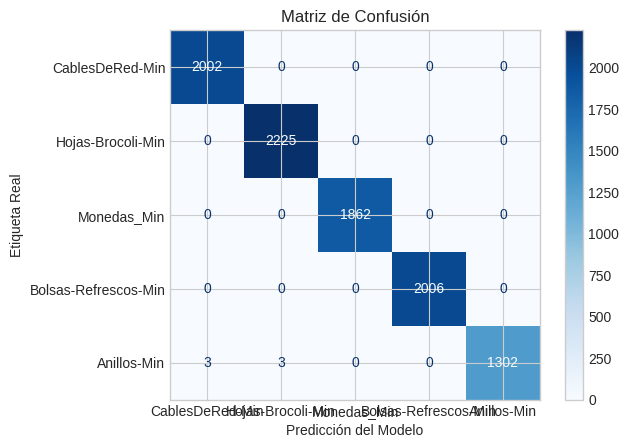


‚úÖ Matriz de confusi√≥n generada.


In [24]:
# CELDA FINAL: Matriz de Confusi√≥n

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print("üìä Generando matriz de confusi√≥n...")

# Asegurarse de que el modelo est√© en modo evaluaci√≥n y en el dispositivo correcto
model.eval()
model.to(device)

all_preds = []
all_labels = []

# Desactivar el c√°lculo de gradientes
with torch.no_grad():
    # Iterar sobre el DataLoader de prueba
    for images, labels in tqdm(test_loader, desc="Calculando predicciones en conjunto de prueba"):
        images, labels = images.to(device), labels.to(device)

        # Obtener las predicciones del modelo
        logits = model(images)
        preds = logits.argmax(dim=-1)

        # Guardar las predicciones y etiquetas reales (movi√©ndolas a la CPU si est√°n en GPU)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular la matriz de confusi√≥n
cm = confusion_matrix(all_labels, all_preds)

# Obtener los nombres de las clases (si est√°n disponibles, si no, usar √≠ndices)
try:
    class_names_display = CLASSES # Usar la variable CLASSES si est√° definida
except NameError:
    class_names_display = [str(i) for i in range(N_CLASSES)] # O usar √≠ndices si no

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_display)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusi√≥n')
plt.xlabel('Predicci√≥n del Modelo')
plt.ylabel('Etiqueta Real')
plt.show()

print("\n‚úÖ Matriz de confusi√≥n generada.")